In [1]:
import pandas as pd
import csv

In [2]:
#import route data
df = pd.read_csv('../Desktop/cs225/final_project/data/routes.dat', header = None)
df

,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [3]:
#import airport data
dg = pd.read_csv('../Desktop/cs225/final_project/data/airports.dat', header = None)
dg[dg.columns[0]] = dg[dg.columns[0]].astype(str)
dg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [4]:
#get only the airport codes 
df = df[[df.columns[3],df.columns[5]]]
df


,3,5
0,2965,2990
1,2966,2990
2,2966,2962
3,2968,2990
4,2968,4078
...,...,...
67658,6334,3341
67659,4029,2912
67660,2912,4029
67661,2912,2913


In [5]:
#merge with airport data
df = df.merge(dg[[dg.columns[0], dg.columns[6], dg.columns[7]]], how = 'inner', left_on = df.columns[0], right_on = dg.columns[0])
df = df.merge(dg[[dg.columns[0], dg.columns[6], dg.columns[7]]], how = 'inner', left_on = df.columns[1], right_on = dg.columns[0])
df

,3,5,0_x,6_x,7_x,0_y,6_y,7_y
0,2965,2990,2965,43.449902,39.956600,2990,55.606201,49.278702
1,2966,2990,2966,46.283298,48.006302,2990,55.606201,49.278702
2,2968,2990,2968,55.305801,61.503300,2990,55.606201,49.278702
3,4029,2990,4029,55.408798,37.906300,2990,55.606201,49.278702
4,4029,2990,4029,55.408798,37.906300,2990,55.606201,49.278702
...,...,...,...,...,...,...,...,...
66766,5543,5490,5543,52.282501,-81.677803,5490,52.201401,-81.696899
66767,5522,5482,5522,54.988098,-85.443298,5482,52.927502,-82.431900
66768,5543,5482,5543,52.282501,-81.677803,5482,52.927502,-82.431900
66769,6276,9904,6276,-20.668301,141.723007,9904,-20.701900,143.115005


In [6]:
#get rid of self loops
df = df.loc[df[df.columns[0]] != df[df.columns[1]]]
df

,3,5,0_x,6_x,7_x,0_y,6_y,7_y
0,2965,2990,2965,43.449902,39.956600,2990,55.606201,49.278702
1,2966,2990,2966,46.283298,48.006302,2990,55.606201,49.278702
2,2968,2990,2968,55.305801,61.503300,2990,55.606201,49.278702
3,4029,2990,4029,55.408798,37.906300,2990,55.606201,49.278702
4,4029,2990,4029,55.408798,37.906300,2990,55.606201,49.278702
...,...,...,...,...,...,...,...,...
66766,5543,5490,5543,52.282501,-81.677803,5490,52.201401,-81.696899
66767,5522,5482,5522,54.988098,-85.443298,5482,52.927502,-82.431900
66768,5543,5482,5543,52.282501,-81.677803,5482,52.927502,-82.431900
66769,6276,9904,6276,-20.668301,141.723007,9904,-20.701900,143.115005


In [7]:
#calculate distance from lat, long data
from geopy import distance
df['distance'] = df.apply(lambda x:distance.distance((x["6_x"], x["7_x"]), (x["6_y"], x["7_y"])).km, axis = 1)
df

C:\Users\benni\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,3,5,0_x,6_x,7_x,0_y,6_y,7_y,distance
0,2965,2990,2965,43.449902,39.956600,2990,55.606201,49.278702,1507.989680
1,2966,2990,2966,46.283298,48.006302,2990,55.606201,49.278702,1040.943207
2,2968,2990,2968,55.305801,61.503300,2990,55.606201,49.278702,773.126239
3,4029,2990,4029,55.408798,37.906300,2990,55.606201,49.278702,718.084202
4,4029,2990,4029,55.408798,37.906300,2990,55.606201,49.278702,718.084202
...,...,...,...,...,...,...,...,...,...
66766,5543,5490,5543,52.282501,-81.677803,5490,52.201401,-81.696899,9.117994
66767,5522,5482,5522,54.988098,-85.443298,5482,52.927502,-82.431900,302.727573
66768,5543,5482,5543,52.282501,-81.677803,5482,52.927502,-82.431900,88.099421
66769,6276,9904,6276,-20.668301,141.723007,9904,-20.701900,143.115005,145.075244


In [8]:
#get airport index
df = df[list(df.columns[:2])+['distance']]
df = df.groupby([df.columns[0], df.columns[1]], as_index = False, sort = False)['distance'].max()
df

,3,5,distance
0,2965,2990,1507.989680
1,2966,2990,1040.943207
2,2968,2990,773.126239
3,4029,2990,718.084202
4,6156,2990,1010.815885
...,...,...,...
36901,5543,5490,9.117994
36902,5522,5482,302.727573
36903,5543,5482,88.099421
36904,6276,9904,145.075244


In [9]:
#how sparse, dense is our graph?
df.groupby(df.columns[0], as_index =False).count().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 0 to 3198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   3         3199 non-null   object
 1   5         3199 non-null   int64 
 2   distance  3199 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 100.0+ KB


total number of edges: 36906
expected maximum number of edges: 5118400.0
greater than 50: 182
greater than 100: 64
greater than 150: 21
greater than 200: 7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FD262FA08>]],
      dtype=object)

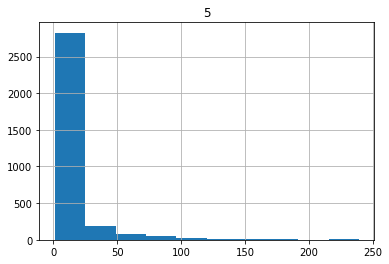

In [10]:
#visualization of how sparse, dense is our graph. our graph is sparse enough.
histogram = df.groupby(df.columns[0], as_index =False).count()
print(f"total number of edges: {histogram[histogram.columns[1]].sum()}" )
print(f"expected maximum number of edges: {histogram[histogram.columns[0]].count()*(histogram[histogram.columns[0]].count()+1)/2}")
print(f"greater than 50: {len(histogram.loc[histogram[histogram.columns[1]] > 50])}" )
print(f"greater than 100: {len(histogram.loc[histogram[histogram.columns[1]] > 100])}" )
print(f"greater than 150: {len(histogram.loc[histogram[histogram.columns[1]] > 150])}" )
print(f"greater than 200: {len(histogram.loc[histogram[histogram.columns[1]] > 200])}" )
histogram.hist(df.columns[1])

In [11]:
#hashmap from open flight codes to integers
dic = {}

for x,y in enumerate(set(list(df[df.columns[0]])+list(df[df.columns[1]]))):
    dic[x] = y
print(len(dic))


3214


In [12]:
#save hashmap
db = [{'openflightcode': x, 'code': y} for x,y in  dic.items()]
db = pd.DataFrame(db, columns = ['openflightcode', 'code'])
db.to_csv('openflightcode', header= False, index = False)
db

,openflightcode,code
0,0,7154
1,1,1198
2,2,6505
3,3,6269
4,4,6026
...,...,...
3209,3209,3845
3210,3210,6382
3211,3211,5613
3212,3212,287


In [13]:
#use hashvalues instead of openflight code
df = df.merge(db, how='inner', left_on = df.columns[0], right_on = 'code')
df = df.merge(db, how='inner', left_on = df.columns[1], right_on = 'code')
df

,3,5,distance,openflightcode_x,code_x,openflightcode_y,code_y
0,2965,2990,1507.989680,2532,2965,2647,2990
1,2966,2990,1040.943207,181,2966,2647,2990
2,2968,2990,773.126239,3073,2968,2647,2990
3,4029,2990,718.084202,1735,4029,2647,2990
4,6156,2990,1010.815885,845,6156,2647,2990
...,...,...,...,...,...,...,...
36901,1993,1981,332.150969,514,1993,1826,1981
36902,5533,105,256.916479,2222,5533,3192,105
36903,5482,5522,302.727573,915,5482,1651,5522
36904,5543,5482,88.099421,2880,5543,915,5482


In [22]:
#make adjacent list
adjacent_list = {}
for i in range(len(df)):
    adjacent_list[str(df.iloc[i, 3])] = adjacent_list.get(str(df.iloc[i, 3]), []) + [str(df.iloc[i, 5]), str(df.iloc[i, 2])]
adjacent_list['0']

['2497', '69.23442818027489']

In [25]:
#save adjacency list as a csvfile
with open('../Downloads/adjacency_list.csv', 'w',newline='') as f:
    writer = csv.writer(f, delimiter = ',')
    writer.writerow([len(db)])
    for x, y in adjacent_list.items():
        writer.writerow([x] + y)

    

In [76]:
#save edges into csv file
df[['code_x', 'code_y']].to_csv('edges.csv',header=False, index = False )

In [38]:
#check there is one single directed edge
for i in range(len(db)):
    if len(set(adjacent_list.get(str(i), []))) != len(adjacent_list.get(str(i), []) ):
        print(str(i), adjacent_list[str(i)])